# Creating Customer Segments

Analysis of a dataset containing annual spending amounts, aiming to identify the internal structure and understand the variation in the different types of customers that a wholesale distributor interacts with.

Part of the Udacity Machine Learning Engineer Nanodegree program.

In [4]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use float division by default
from __future__ import division

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Set plot style
plt.style.use('bmh')
mpl.rcParams['font.family'] = 'Ubuntu'
mpl.rcParams['font.size'] = 12
mpl.rcParams['figure.figsize'] = [10, 7]

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section, you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: ICA seeks to transform a set of mixed signals to a set of source signals. (For example, in the case of the "Cocktail party problem", the source signals can be different speakers, and the mixed signals are the sounds recorded by different microphones.)
Since the mixed signals here are the orders of 
different stores, I think the ICA dimensions will represent different store sections.

PCA transforms the data into a new feature space too, but instead of looking for source signals, it just maximizes the captured variance for each of the new dimensions.
While this can be very useful for dimensionality reduction, the new components don't have inherent meanings.

### PCA

        Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0.460  -0.977  -0.121   -0.062  -0.152             0.007        -0.068
0.405  -0.111   0.516    0.765  -0.019             0.365         0.057
0.070  -0.179   0.510   -0.276   0.714            -0.204         0.283
0.044  -0.042  -0.646    0.375   0.646             0.149        -0.020
0.015   0.016   0.203   -0.160   0.220             0.208        -0.917
0.006  -0.016   0.033    0.411  -0.013            -0.871        -0.265


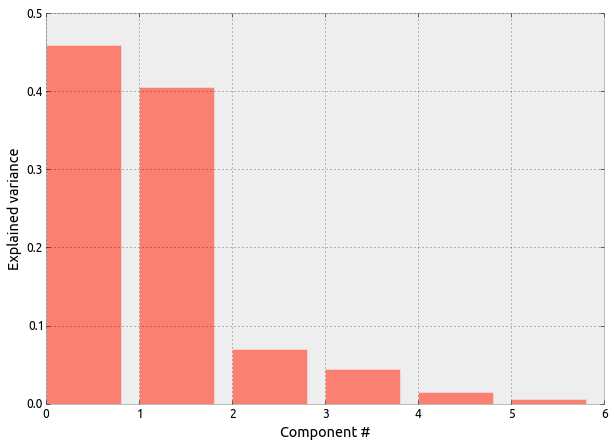

In [3]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(data.shape[1]).fit(data)

# Print the components and the amount of variance in the data contained in each dimension
components = pd.DataFrame(data=pca.components_, columns=data.columns.get_values(), index=pca.explained_variance_ratio_)

pd.set_option('float_format', '{:7,.3f}'.format)
print components

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, color='salmon')
plt.xlabel('Component #')
plt.ylabel('Explained variance')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

### ICA

In [ ]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = ?

# Print the independent components
print ica.components_

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [ ]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [ ]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = ?
print reduced_data[:10]  # print upto 10 elements

In [ ]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters = ?
print clusters

In [ ]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = ?
print centroids

In [ ]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

**9)** How would you use that technique to help the company design new experiments?

Answer: 

**10)** How would you use that data to help you predict future customer needs?

Answer: 